In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("mouse_viral_study.csv")
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


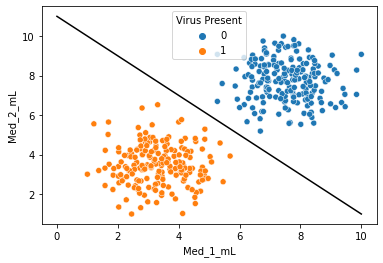

In [40]:
sns.scatterplot(x="Med_1_mL", y = "Med_2_mL", hue = "Virus Present", data = df)

#HYPERPLANE
x=np.linspace(0,10,100)
m=-1
b=11
y = m*x+b
plt.plot(x,y, "black")

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


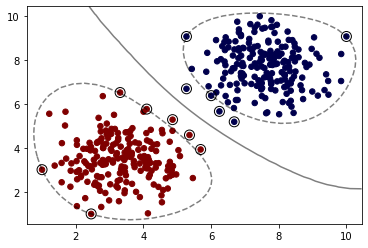

In [41]:
from sklearn.svm import SVC
y = df["Virus Present"]
x=df.drop("Virus Present", axis=1)
#kernel = linear
#larger gamma means more variance (can lead to overfit)
model = SVC(kernel="rbf", C=1, gamma="scale")
model.fit(x, y)
plot_svm(x,y,model)

In [42]:
def plot_svm(x,y,model):
  X = x.values
  y = y.values

  # Scatter Plot
  plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')


  # plot the decision function
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # create grid to evaluate model
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = model.decision_function(xy).reshape(XX.shape)

  # plot decision boundary and margins
  ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
  # plot support vectors
  ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
  plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


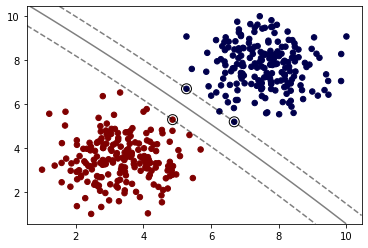

In [43]:
from sklearn.svm import SVC
y = df["Virus Present"]
x=df.drop("Virus Present", axis=1)
#larger gamma means more variance (can lead to overfit)
model = SVC(kernel="poly", C=1, gamma="scale")
model.fit(x, y)
plot_svm(x,y,model)

In [44]:
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {"C": [0.01, 0.1, 1, 10], "kernel": ["linear", "rbf"]}
grid = GridSearchCV(svm, param_grid)
grid.fit(x,y)
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

# Exercise

In [45]:
df = pd.read_csv("cement_slump.csv")
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


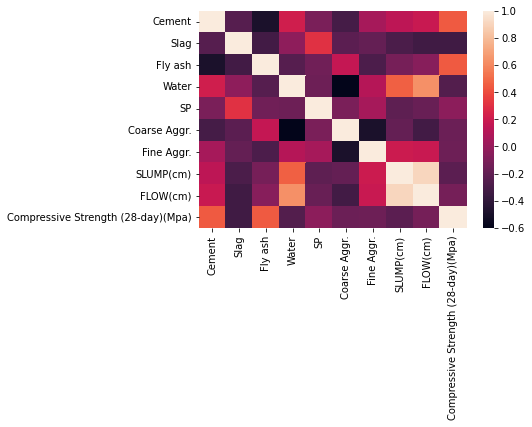

In [46]:
sns.heatmap(df.corr())

In [52]:
x = df.drop("Compressive Strength (28-day)(Mpa)", axis=1)
y = df["Compressive Strength (28-day)(Mpa)"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
from sklearn.svm import SVR, LinearSVR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = SVR(C=1, degree=4,epsilon=4, kernel="linear")
model.fit(x_train, y_train)
preds = model.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, preds)
mse = np.sqrt(mean_squared_error(y_test, preds))
print(mae, mse)

2.190449335547873 2.638969710571387
